In [13]:
import mne
import numpy as np
from mne.datasets import eegbci
from mne.channels import make_standard_montage

# 07
subject = '07'

raw_RorL1 = mne.io.read_raw_edf("D:\physionet_dataset\S0" + str(subject) +"\S0" + str(subject) +"R04.edf",preload = True)
raw_RorL2 = mne.io.read_raw_edf("D:\physionet_dataset\S0" + str(subject) +"\S0" + str(subject) +"R08.edf",preload = True)
raw_RorL3 = mne.io.read_raw_edf("D:\physionet_dataset\S0" + str(subject) +"\S0" + str(subject) +"R12.edf",preload = True)

raw_RorL = mne.concatenate_raws([raw_RorL1, raw_RorL2, raw_RorL3])

raw_Both1 = mne.io.read_raw_edf("D:\physionet_dataset\S0" + str(subject) +"\S0" + str(subject) +"R06.edf",preload = True)
raw_Both2 = mne.io.read_raw_edf("D:\physionet_dataset\S0" + str(subject) +"\S0" + str(subject) +"R10.edf",preload = True)
raw_Both3 = mne.io.read_raw_edf("D:\physionet_dataset\S0" + str(subject) +"\S0" + str(subject) +"R14.edf",preload = True)

raw_Both = mne.concatenate_raws([raw_Both1, raw_Both2, raw_Both3])

# events = mne.read_events("D:\physionet_dataset\S001\S001R02.edf.event")
print(np.shape(raw_RorL.get_data()), np.shape(raw_Both.get_data()))

eegbci.standardize(raw_RorL)  # set channel names
montage = make_standard_montage("standard_1005") 
raw_RorL.set_montage(montage)

eegbci.standardize(raw_Both)  # set channel names
montage = make_standard_montage("standard_1005")
raw_Both.set_montage(montage)

Extracting EDF parameters from D:\physionet_dataset\S007\S007R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from D:\physionet_dataset\S007\S007R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from D:\physionet_dataset\S007\S007R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from D:\physionet_dataset\S007\S007R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from D:\physionet_dataset\S007\S007R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
R

<RawEDF | S007R06.edf, 64 x 60000 (375.0 s), ~29.4 MB, data loaded>

# MRCP & LF-ADS

In [14]:
import sys
import matplotlib.pyplot as plt

RorL1 = raw_RorL.copy().filter(l_freq=0.1, h_freq=3.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
RorL1 = RorL1.copy().set_eeg_reference(ref_channels="average")

Both1 = raw_Both.copy().filter(l_freq=0.1, h_freq=3.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
Both1 = Both1.copy().set_eeg_reference(ref_channels="average")

RorL1= RorL1.pick_channels(['C3','Cz','C4'])
events_RorL, _ = mne.events_from_annotations(RorL1)

Both1= Both1.pick_channels(['C3','Cz','C4'])
events_Both, _ = mne.events_from_annotations(Both1)

event_ids1 = dict(Rest=1, Left=2, Right=3)
event_ids2 = dict(Rest=1, Both_fits=2, Both_feet=3)

RorL_epochs = mne.Epochs(RorL1, events_RorL, 
        tmin=-1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax=3.0,    # final timestamp (10 means set epoch duration 10 second)
        event_id= event_ids1,
        preload = True,
        event_repeated='drop'
    )

Both_epochs = mne.Epochs(Both1, events_Both, 
        tmin=-1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax=3.0,    # final timestamp (10 means set epoch duration 10 second)
        event_id= event_ids2,
        preload = True,
        event_repeated='drop'
    )

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 0.1 - 3 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 0.10, 3.00 Hz: -6.02, -6.02 dB



c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 0.1 - 3 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 0.10, 3.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
90 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 90 events and 721 original time points ...
3 bad epochs dropped
Not setting metadata
90 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying base

In [15]:
RorL_epochs

Number of events,87
Events,Left: 23Rest: 42Right: 22
Time range,-1.500 – 3.000 sec
Baseline,-1.500 – 0.000 sec


In [16]:
Both_epochs

Number of events,87
Events,Both_feet: 23Both_fits: 22Rest: 42
Time range,-1.500 – 3.000 sec
Baseline,-1.500 – 0.000 sec


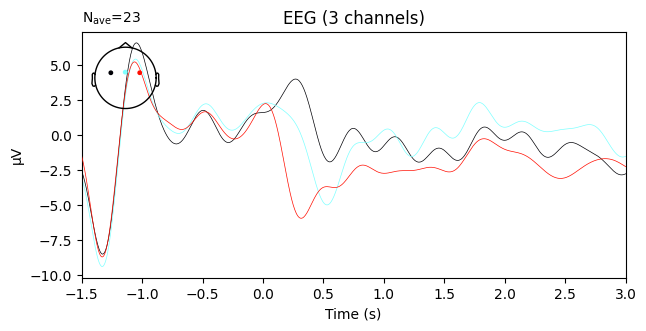

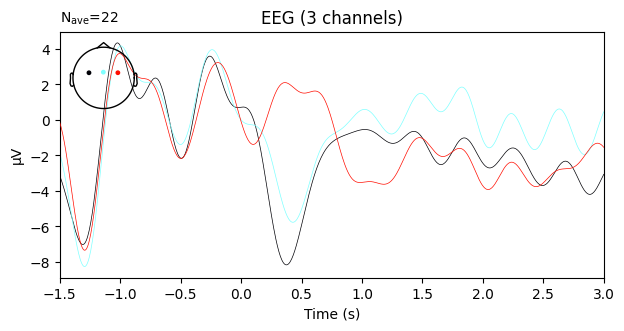

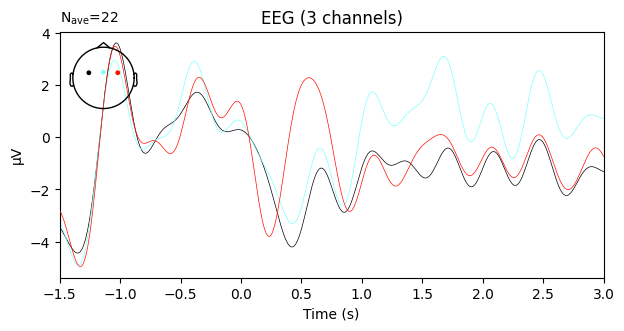

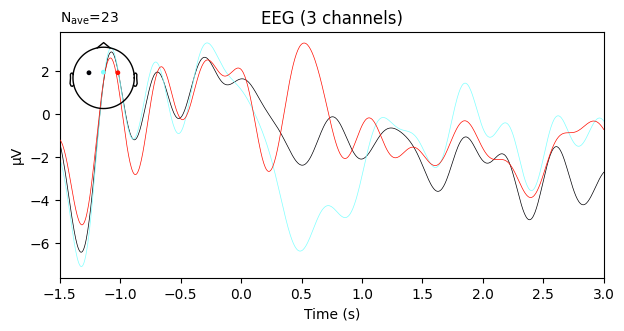

...


In [17]:
RorL_epochs['Left'].average().plot()
RorL_epochs['Right'].average().plot()
Both_epochs['Both_fits'].average().plot()
Both_epochs['Both_feet'].average().plot()
print('...')

# ERDS Left and Right

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import pandas as pd
import seaborn as sns
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test

In [19]:
eeg2 = raw_RorL.copy().filter(l_freq=8.0, h_freq=30.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg2 = eeg2.copy().set_eeg_reference(ref_channels="average")

events, _ = mne.events_from_annotations(eeg2)
event_ids = dict(Left=2, Right=3)
erds_epochs = mne.Epochs(eeg2, events,event_ids,
        tmin = -1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax = 4.0,    # final timestamp (10 means set epoch duration 10 second)
        picks=("C3", "Cz", "C4"),
        preload = True,
        event_repeated='drop'
    )

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 881 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Not setting metadata
Applying baseline correction (mode: percent)
Using a threshold of 1.717144
stat_fun(H1): min=-4.638006 max=3.682827
Running initial clustering …
Found 19 clusters


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Permuting : 99/99 [00:00<00:00,  606.09it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.717144
stat_fun(H1): min=-4.638006 max=3.682827


Running initial clustering …
Found 20 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  622.19it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  524.02it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
No baseline correction applied


Using a threshold of 1.717144
stat_fun(H1): min=-4.666339 max=4.610346
Running initial clustering …
Found 18 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  547.78it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  553.20it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.717144
stat_fun(H1): min=-4.666339 max=4.610346
Running initial clustering …
Found 30 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  603.21it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.717144


stat_fun(H1): min=-8.214741 max=2.972218
Running initial clustering …
Found 13 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  510.71it/s]


Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.717144
stat_fun(H1): min=-8.214741 max=2.972218
Running initial clustering …
Found 25 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  545.97it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied


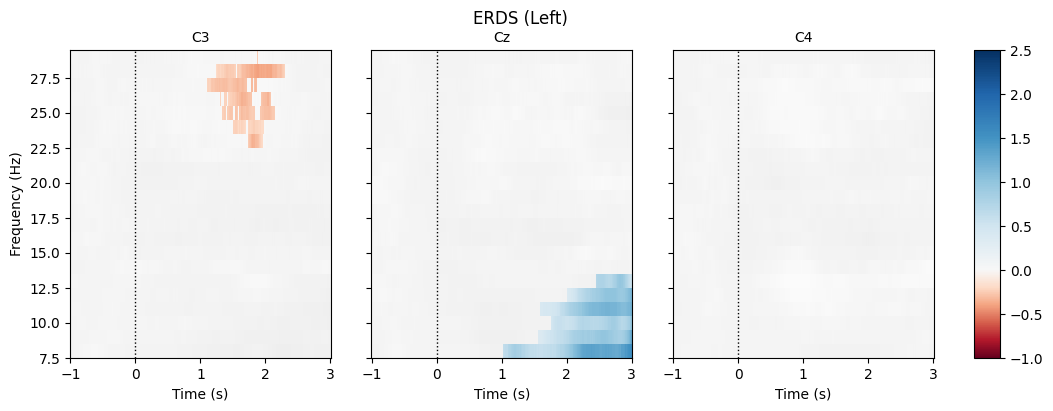

Using a threshold of 1.720743
stat_fun(H1): min=-8.707607 max=3.964039
Running initial clustering …
Found 5 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  541.79it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


Using a threshold of -1.720743
stat_fun(H1): min=-8.707607 max=3.964039
Running initial clustering …
Found 33 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  511.18it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  525.30it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
No baseline correction applied


Using a threshold of 1.720743
stat_fun(H1): min=-4.473730 max=4.179029
Running initial clustering …
Found 13 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  494.38it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  586.12it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations


Using a threshold of -1.720743
stat_fun(H1): min=-4.473730 max=4.179029
Running initial clustering …
Found 32 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  543.68it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


No baseline correction applied
Using a threshold of 1.720743
stat_fun(H1): min=-4.654670 max=2.792975
Running initial clustering …
Found 19 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  535.79it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


Using a threshold of -1.720743
stat_fun(H1): min=-4.654670 max=2.792975
Running initial clustering …
Found 25 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  519.79it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


No baseline correction applied


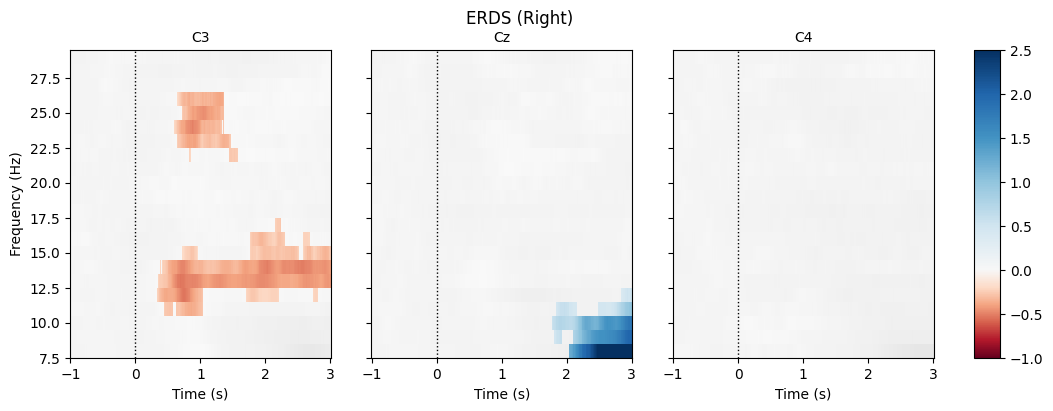

In [20]:
freqs = np.arange(8, 30)  # frequencies from 2-35Hz
vmin, vmax = -1, 2.5  # set min and max ERDS values in plot
baseline = (-1, 0)  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(
    n_permutations=100, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test

tfr = tfr_multitaper(
    erds_epochs,
    freqs=freqs,
    n_cycles=freqs,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
)
tfr.crop(-1, 3).apply_baseline(baseline, mode="percent")

for event in event_ids:
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    fig, axes = plt.subplots(
        1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
    )
    for ch, ax in enumerate(axes[:-1]):  # for each channel
        # positive clusters
        _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
        # negative clusters
        _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot(
            [ch],
            cmap="RdBu",
            cnorm=cnorm,
            axes=ax,
            colorbar=False,
            show=False,
            mask=mask,
            mask_style="mask",
        )

        ax.set_title(erds_epochs.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS ({event})")
    plt.show()

In [21]:
# df = tfr.to_data_frame(time_format=None, long_format=True)

# # Map to frequency bands:
# freq_bounds = {"_": 0, "delta": 3, "theta": 7, "alpha": 13, "beta": 35, "gamma": 140}
# df["band"] = pd.cut(
#     df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
# )

# # Filter to retain only relevant frequency bands:
# freq_bands_of_interest = ["delta", "theta", "alpha", "beta"]
# df = df[df.band.isin(freq_bands_of_interest)]
# df["band"] = df["band"].cat.remove_unused_categories()

# # Order channels for plotting:
# df["channel"] = df["channel"].cat.reorder_categories(("C3", "Cz", "C4"), ordered=True)

# g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
# g.map(sns.lineplot, "time", "value", "condition", n_boot=10)
# axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
# g.map(plt.axhline, y=0, **axline_kw)
# g.map(plt.axvline, x=0, **axline_kw)
# g.set(ylim=(None, vmax))
# g.set_axis_labels("Time (s)", "ERDS")
# g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.add_legend(ncol=2, loc="lower center")
# g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)
# plt.show()

# ERSD Both Fits and Feet

In [22]:
eeg2 = raw_Both.copy().filter(l_freq=8.0, h_freq=30.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg2 = eeg2.copy().set_eeg_reference(ref_channels="average")

events, _ = mne.events_from_annotations(eeg2)
event_ids = dict(Both_fits=2, Both_feet=3)
erds_epochs = mne.Epochs(eeg2, events,event_ids,
        tmin = -1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax = 4.0,    # final timestamp (10 means set epoch duration 10 second)
        picks=("C3", "Cz", "C4"),
        preload = True,
        event_repeated='drop'
    )

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 881 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Not setting metadata
Applying baseline correction (mode: percent)
Using a threshold of 1.720743
stat_fun(H1): min=-6.004288 max=2.920319
Running initial clustering …
Found 11 clusters


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
100%|██████████| Permuting : 99/99 [00:00<00:00,  570.59it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.720743
stat_fun(H1): min=-6.004288 max=2.920319
Running initial clustering …
Found 19 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  710.34it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.720743
stat_fun(H1): min=-4.714355 max=3.073641
Running initial clustering …
Found 9 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  652.12it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


Using a threshold of -1.720743
stat_fun(H1): min=-4.714355 max=3.073641
Running initial clustering …
Found 27 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  754.49it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


No baseline correction applied
Using a threshold of 1.720743
stat_fun(H1): min=-6.769237 max=3.588231
Running initial clustering …
Found 16 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  741.33it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.720743
stat_fun(H1): min=-6.769237 max=3.588231


Running initial clustering …
Found 22 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  740.00it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied


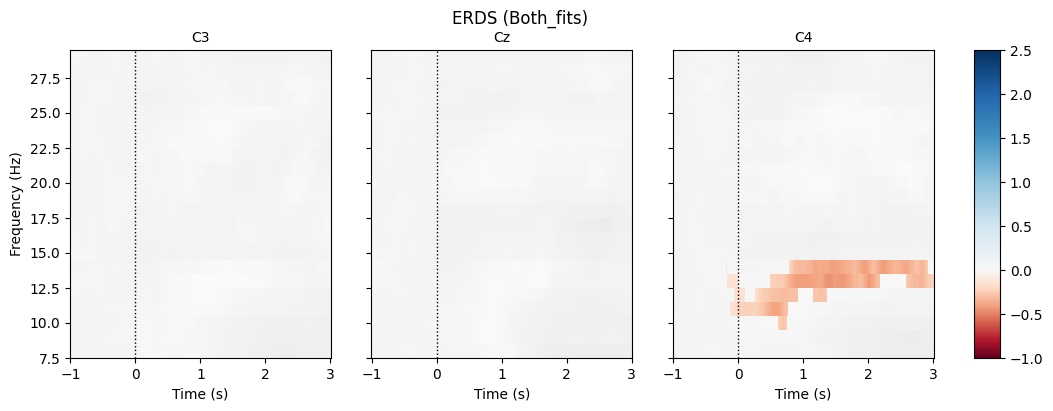

Using a threshold of 1.717144
stat_fun(H1): min=-3.472594 max=3.134954
Running initial clustering …
Found 13 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  728.34it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  733.01it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.717144
stat_fun(H1): min=-3.472594 max=3.134954
Running initial clustering …


Found 23 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  716.71it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.717144
stat_fun(H1): min=-2.707971 max=3.146148
Running initial clustering …
Found 20 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  728.47it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  720.87it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.717144


stat_fun(H1): min=-2.707971 max=3.146148
Running initial clustering …
Found 30 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  711.02it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.717144
stat_fun(H1): min=-3.354657 max=3.228208
Running initial clustering …
Found 19 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  459.94it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  558.92it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.717144
stat_fun(H1): min=-3.354657 max=3.228208
Running initial clustering …
Found 22 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  574.94it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


No baseline correction applied


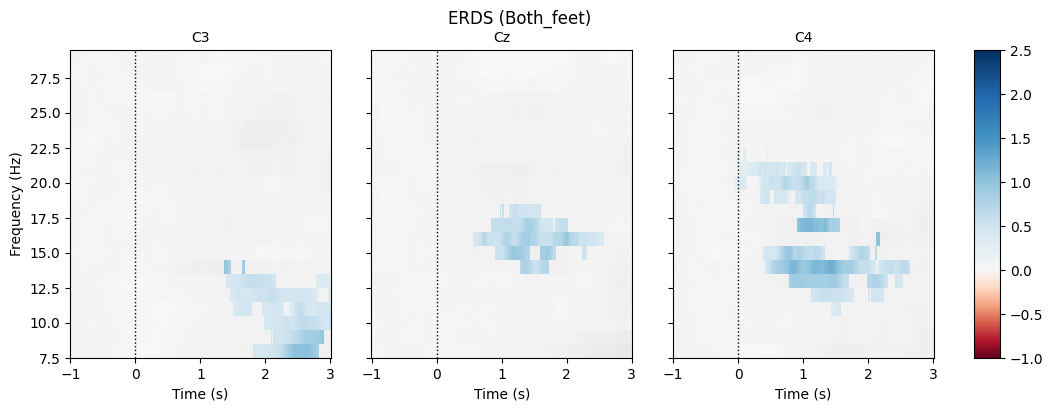

In [23]:
freqs = np.arange(8, 30)  # frequencies from 2-35Hz
vmin, vmax = -1, 2.5  # set min and max ERDS values in plot
baseline = (-1, 0)  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(
    n_permutations=100, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test

tfr = tfr_multitaper(
    erds_epochs,
    freqs=freqs,
    n_cycles=freqs,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
)
tfr.crop(-1, 3).apply_baseline(baseline, mode="percent")

for event in event_ids:
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    fig, axes = plt.subplots(
        1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
    )
    for ch, ax in enumerate(axes[:-1]):  # for each channel
        # positive clusters
        _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
        # negative clusters
        _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot(
            [ch],
            cmap="RdBu",
            cnorm=cnorm,
            axes=ax,
            colorbar=False,
            show=False,
            mask=mask,
            mask_style="mask",
        )

        ax.set_title(erds_epochs.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS ({event})")
    plt.show()

In [24]:
# df = tfr.to_data_frame(time_format=None, long_format=True)

# # Map to frequency bands:
# freq_bounds = {"_": 0, "delta": 3, "theta": 7, "alpha": 13, "beta": 35, "gamma": 140}
# df["band"] = pd.cut(
#     df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
# )

# # Filter to retain only relevant frequency bands:
# freq_bands_of_interest = ["delta", "theta", "alpha", "beta"]
# df = df[df.band.isin(freq_bands_of_interest)]
# df["band"] = df["band"].cat.remove_unused_categories()

# # Order channels for plotting:
# df["channel"] = df["channel"].cat.reorder_categories(("C3", "Cz", "C4"), ordered=True)

# g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
# g.map(sns.lineplot, "time", "value", "condition", n_boot=10)
# axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
# g.map(plt.axhline, y=0, **axline_kw)
# g.map(plt.axvline, x=0, **axline_kw)
# g.set(ylim=(None, vmax))
# g.set_axis_labels("Time (s)", "ERDS")
# g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.add_legend(ncol=2, loc="lower center")
# g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)
# plt.show()

# CSP

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit,StratifiedKFold ,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from mne import Epochs, pick_types, events_from_annotations, create_info
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.time_frequency import AverageTFR

In [26]:
eeg3 = raw_RorL.copy().filter(l_freq=0.05, h_freq=3, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg3 = eeg3.copy().set_eeg_reference(ref_channels="average")

eeg4 = raw_Both.copy().filter(l_freq=0.05, h_freq=3, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg4 = eeg4.copy().set_eeg_reference(ref_channels="average")

# eeg3= eeg3.pick_channels(['FC3','C5','CP3','C3','Cz','C4','C6','FC4','CP4'])
eeg3= eeg3.pick_channels(['C3','Cz','C4'])
events_RorL, _ = mne.events_from_annotations(eeg3)

# eeg4 = eeg4.pick_channels(['FC3','C5','CP3','C3','Cz','C4','C6','FC4','CP4'])
eeg4= eeg4.pick_channels(['C3','Cz','C4'])
events_Both, _ = mne.events_from_annotations(eeg4)

event_ids1 = dict(Left=2, Right=3)
event_ids2 = dict(Both_fits=2,Both_feet=3)

RorL_epochs = mne.Epochs(eeg3, events_RorL, 
        tmin=-1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax=4.0,    # final timestamp (10 means set epoch duration 10 second)
        event_id= event_ids1,
        preload = True,
        event_repeated='drop'
    )

Both_epochs = mne.Epochs(eeg4, events_Both, 
        tmin=-1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax=4.0,    # final timestamp (10 means set epoch duration 10 second)
        event_id= event_ids2,
        preload = True,
        event_repeated='drop'
    )

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 0.05 - 3 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 0.05, 3.00 Hz: -6.02, -6.02 dB



c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 0.05 - 3 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 0.05, 3.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 881 original time points ...
0 bad epochs dropped
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying bas

Computing rank from data with rank=None
    Using tolerance 5.6e-07 (2.2e-16 eps * 3 dim * 8.4e+08  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6e-07 (2.2e-16 eps * 3 dim * 9e+08  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-07 (2.2e-16 eps * 3 dim * 1e+09  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.1e-07 (2.2e-16 eps * 3 dim * 9.2e+08  max singular value)
    Estimated rank (mag):

Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.3e-07 (2.2e-16 eps * 3 dim * 9.5e+08  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.6e-07 (2.2e-16 eps * 3 dim * 8.4e+08  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6e-07 (2.2e-16 eps * 3 dim * 9e+08  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.2e-07 

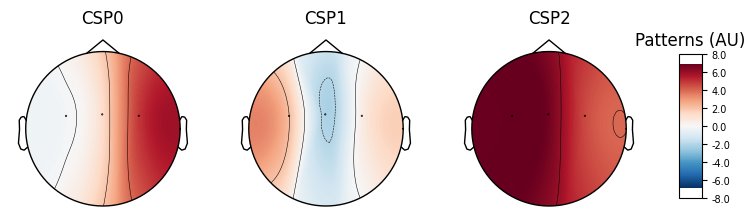

Classification accuracy: 0.266667 / Chance level: 0.744444
[[ 7  3  6  7]
 [ 8  4  5  5]
 [ 3  2 11  6]
 [ 6  1  9  7]]


In [27]:
# left = 1, right = 2, both_fits = 3, both_feet = 4
CSP_train_RorL = RorL_epochs.copy().crop(tmin=0, tmax=3.5)
labels_RorL = RorL_epochs.events[:, -1] -1 

CSP_train_Both = Both_epochs.copy().crop(tmin=0, tmax=3.5)
labels_Both = Both_epochs.events[:, -1] +1

CSP_train = np.vstack((CSP_train_RorL.get_data(), CSP_train_Both.get_data()))
labels = np.concatenate((labels_RorL,labels_Both))

scores = []
CSP_epochs_data =  np.vstack((RorL_epochs.get_data(), Both_epochs.get_data()))
CSP_epochs_data_train = CSP_train 
cv = ShuffleSplit(5, test_size=0.2, random_state=42)
cv_split = cv.split(CSP_epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=3, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([("CSP", csp), ("LDA", lda)])
scores = cross_val_score(clf, CSP_epochs_data_train, labels, cv=cv, n_jobs=None)
CSP_predicted = cross_val_predict(clf, CSP_epochs_data_train, labels, cv=5)
# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1.0 - class_balance)

# plot CSP patterns estimated on full data for visualization
CSP_coff = csp.fit_transform(CSP_epochs_data, labels)

csp.plot_patterns(CSP_train_RorL.info, ch_type="eeg", units="Patterns (AU)", size=1.5)

print(
    "Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance)
)

conf_matrix = confusion_matrix(labels, CSP_predicted)
print(conf_matrix)


In [28]:
array_2d = CSP_train.reshape(np.shape(CSP_train)[0], np.shape(CSP_train)[1]*np.shape(CSP_train)[2])

scores = cross_val_score(lda, array_2d, labels, cv=cv, n_jobs=None)
CSP_predicted = cross_val_predict(lda, array_2d, labels, cv=5)

conf_matrix = confusion_matrix(labels, CSP_predicted)
print("LDA only classification scores", np.mean(scores))
print(conf_matrix)

LDA only classification scores 0.3555555555555555
[[10  3  6  4]
 [ 2  8  6  6]
 [ 6  5  7  4]
 [ 5  7  3  8]]


Computing rank from data with rank=None
    Using tolerance 5.6e-07 (2.2e-16 eps * 3 dim * 8.4e+08  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6e-07 (2.2e-16 eps * 3 dim * 9e+08  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-07 (2.2e-16 eps * 3 dim * 1e+09  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.1e-07 (2.2e-16 eps * 3 dim * 9.2e+08  max singular value)
    Estimated rank (mag):

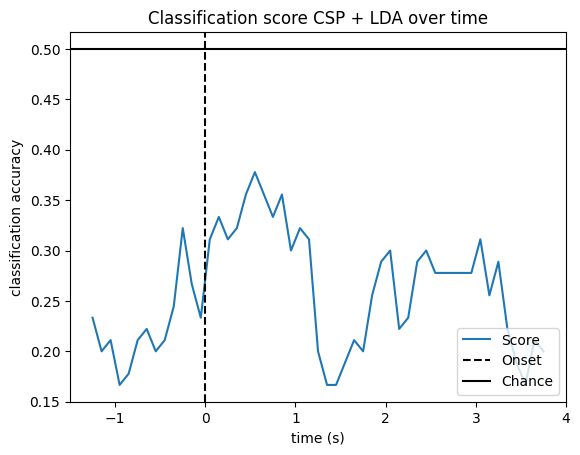

In [29]:
sfreq = eeg3.info["sfreq"]
w_length = int(sfreq * 0.5)  # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, CSP_epochs_data.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(CSP_epochs_data_train[train_idx], y_train)
    X_test = csp.transform(CSP_epochs_data_train[test_idx])

    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(CSP_epochs_data[test_idx][:, :, n : (n + w_length)])
        # print(np.shape(CSP_epochs_data[test_idx][:, :, n : (n + w_length)]))
        score_this_window.append(lda.score(X_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.0) / sfreq + RorL_epochs.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label="Score")
plt.axvline(0, linestyle="--", color="k", label="Onset")
plt.axhline(0.5, linestyle="-", color="k", label="Chance")
plt.xlabel("time (s)")
plt.ylabel("classification accuracy")
plt.title("Classification score CSP + LDA over time")
plt.legend(loc="lower right")
plt.show()

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 0.1 - 3.4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 0.10, 3.42 Hz: -6.02, -6.02 dB



c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 0.1 - 3.4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 0.10, 3.42 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 721 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying ba

c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 3.4 - 6.7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 3.42, 6.74 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 721 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying ba

c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 6.7 - 10 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 6.74, 10.07 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 721 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying ba

c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 10 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 10.07, 13.39 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 721 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying ba

c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 13 - 17 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 13.39, 16.71 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 721 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying ba

c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 17 - 20 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 16.71, 20.03 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 721 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying ba

c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 20 - 23 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 20.03, 23.36 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 721 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying ba

c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 23 - 27 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 23.36, 26.68 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 721 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying ba

c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 27 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 26.68, 30.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 721 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying ba

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


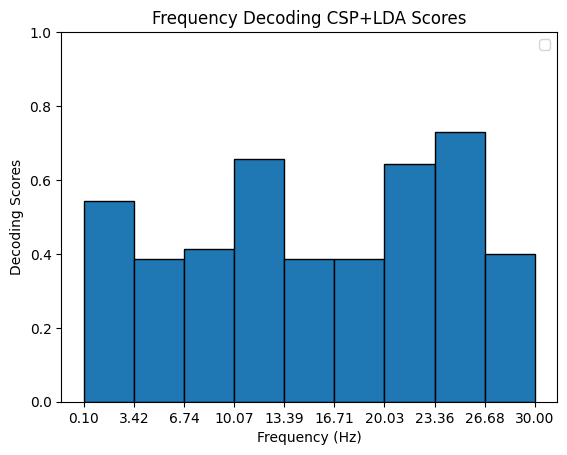

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


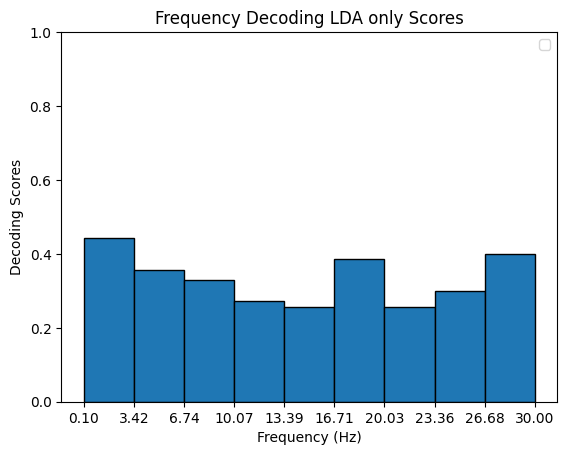

In [30]:
# Classification & time-frequency parameters
tmin, tmax = 0.000, 3.500
n_cycles = 10.0  # how many complete cycles: used to define window size
min_freq = 0.1
max_freq = 30.0
n_freqs = 10 # how many frequency bins to use

# Assemble list of frequency range tuples
freqs = np.linspace(min_freq, max_freq, n_freqs)  # assemble frequencies
freq_ranges = list(zip(freqs[:-1], freqs[1:]))  # make freqs list of tuples

# Infer window spacing from the max freq and number of cycles to avoid gaps
window_spacing = n_cycles / np.max(freqs) / 2.0
centered_w_times = np.arange(tmin, tmax, window_spacing)[1:]
n_windows = len(centered_w_times)

# Instantiate label encoder
le = LabelEncoder()

freq_scores_CSP = np.zeros((n_freqs - 1,))
freq_scores_LDA = np.zeros((n_freqs - 1,))

# Loop through each frequency range of interest
for freq, (fmin, fmax) in enumerate(freq_ranges):
    # Infer window size based on the frequency being used
    w_size = n_cycles / ((fmax + fmin) / 2.0)  # in seconds

    # Apply band-pass filter to isolate the specified frequencies
    eeg3 = raw_RorL.copy().filter(l_freq=fmin, h_freq=fmax, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
    eeg3 = eeg3.copy().set_eeg_reference(ref_channels="average")

    eeg4 = raw_Both.copy().filter(l_freq=fmin, h_freq=fmax, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
    eeg4 = eeg4.copy().set_eeg_reference(ref_channels="average")

    # eeg3= eeg3.pick_channels(['FC3','C5','CP3','C3','Cz','C4','C6','FC4','CP4'])
    eeg3= eeg3.pick_channels(['C3','Cz','C4'])
    events_RorL, _ = mne.events_from_annotations(eeg3)

    # eeg4 = eeg4.pick_channels(['FC3','C5','CP3','C3','Cz','C4','C6','FC4','CP4'])
    eeg4= eeg4.pick_channels(['C3','Cz','C4'])
    events_Both, _ = mne.events_from_annotations(eeg4)

    event_ids1 = dict(Left=2, Right=3)
    event_ids2 = dict(Both_feet=3)

    RorL_epochs = mne.Epochs(eeg3, events_RorL, 
            tmin=-1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
            tmax=3.0,    # final timestamp (10 means set epoch duration 10 second)
            event_id= event_ids1,
            preload = True,
            event_repeated='drop'
        )

    Both_epochs = mne.Epochs(eeg4, events_Both, 
            tmin=-1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
            tmax=3.0,    # final timestamp (10 means set epoch duration 10 second)
            event_id= event_ids2,
            preload = True,
            event_repeated='drop'
        )
    # CSP_epochs2.drop_bad()

    CSP_train_RorL = RorL_epochs.copy().crop(tmin=0, tmax=1.5)
    labels_RorL = RorL_epochs.events[:, -1] -1 

    CSP_train_Both = Both_epochs.copy().crop(tmin=0, tmax=1.5)
    labels_Both = Both_epochs.events[:, -1] +1

    CSP_train = np.vstack((CSP_train_RorL.get_data(), CSP_train_Both.get_data()))
    labels = np.concatenate((labels_RorL,labels_Both))

    y = le.fit_transform(labels)

    X = CSP_train

    # Save mean scores over folds for each frequency and time window
    freq_scores_CSP[freq] = np.mean(
        cross_val_score(estimator=clf, X=X, y=y, cv=cv), axis=0
    )
    shape = np.shape(CSP_train)
    
    X = CSP_train.reshape(shape[0], shape[1]*shape[2])

    freq_scores_LDA[freq] = np.mean(
        cross_val_score(estimator=lda, X=X, y=y, cv=cv), axis=0
    )

plt.bar(
    freqs[:-1], freq_scores_CSP, width=np.diff(freqs)[0], align="edge", edgecolor="black"
)
plt.xticks(freqs)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Decoding Scores")
plt.title("Frequency Decoding CSP+LDA Scores")
plt.show()


plt.bar(
    freqs[:-1], freq_scores_LDA, width=np.diff(freqs)[0], align="edge", edgecolor="black"
)
plt.xticks(freqs)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Decoding Scores")
plt.title("Frequency Decoding LDA only Scores")
plt.show()